In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as sts

from sklearn import svm
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss, confusion_matrix

sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/content/Weather Data.csv')
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,17,20,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,9,13,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,22,20,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,11,6,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,6/21/2017,8.6,19.6,0.0,2.0,7.8,SSE,37,W,SSE,22,20,73,52,1025.9,1025.3,2,2,10.5,17.9,No,No
3267,6/22/2017,9.3,19.2,0.0,2.0,9.2,W,30,W,ESE,20,7,78,53,1028.5,1024.6,2,2,11.0,18.7,No,No
3268,6/23/2017,9.4,17.7,0.0,2.4,2.7,W,24,WNW,N,15,13,85,56,1020.8,1015.0,6,6,10.2,17.3,No,No
3269,6/24/2017,10.1,19.3,0.0,1.4,9.3,W,43,W,W,17,19,56,35,1017.3,1015.1,5,2,12.4,19.0,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

In [4]:
df['Date'] = df['Date'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3271 non-null   datetime64[ns]
 1   MinTemp        3271 non-null   float64       
 2   MaxTemp        3271 non-null   float64       
 3   Rainfall       3271 non-null   float64       
 4   Evaporation    3271 non-null   float64       
 5   Sunshine       3271 non-null   float64       
 6   WindGustDir    3271 non-null   object        
 7   WindGustSpeed  3271 non-null   int64         
 8   WindDir9am     3271 non-null   object        
 9   WindDir3pm     3271 non-null   object        
 10  WindSpeed9am   3271 non-null   int64         
 11  WindSpeed3pm   3271 non-null   int64         
 12  Humidity9am    3271 non-null   int64         
 13  Humidity3pm    3271 non-null   int64         
 14  Pressure9am    3271 non-null   float64       
 15  Pressure3pm    3271 n

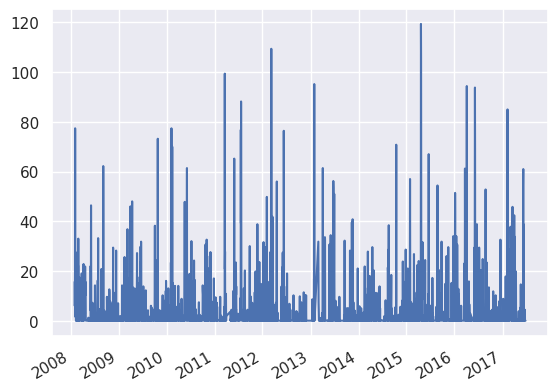

In [5]:
x = df['Date']
y = df['Rainfall']

plt.plot(x, y)
plt.gcf().autofmt_xdate()
plt.show()

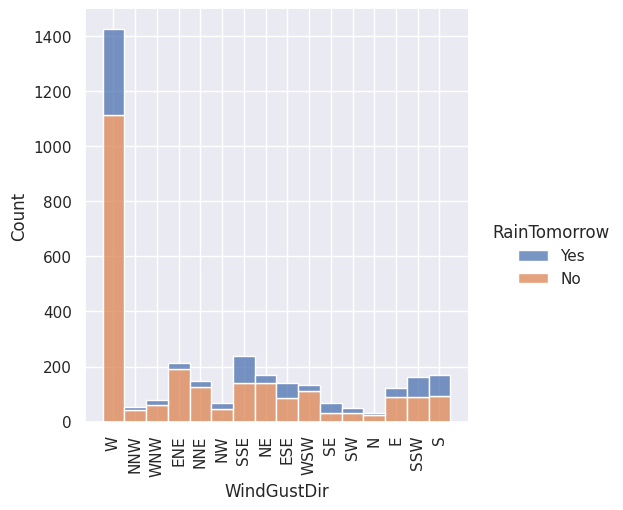

In [6]:
from operator import mul
sns.displot(x = 'WindGustDir',hue='RainTomorrow',data=df,multiple='stack')
plt.xticks(rotation=90)
plt.show()

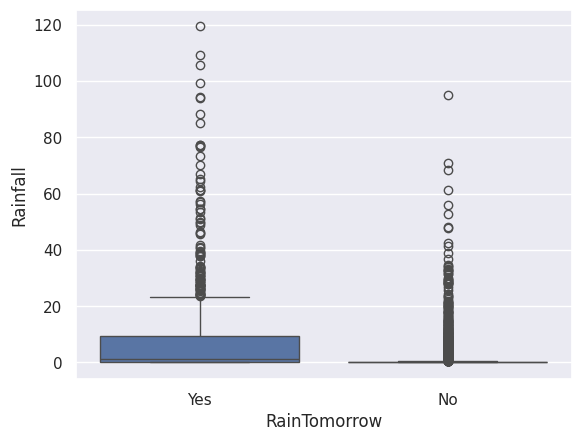

In [7]:
sns.boxplot(x='RainTomorrow',y='Rainfall',data=df)
plt.show()

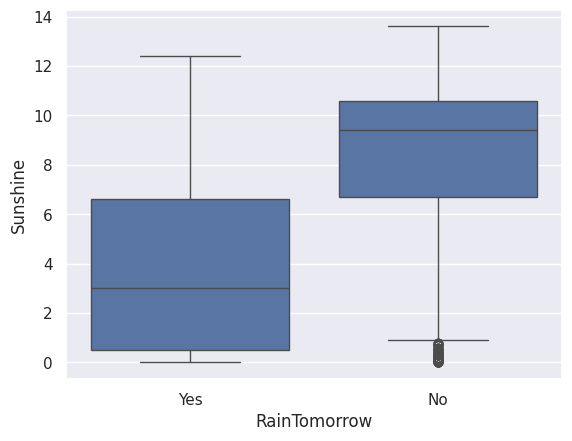

In [8]:
sns.boxplot(x='RainTomorrow',y='Sunshine',data=df)
plt.show()

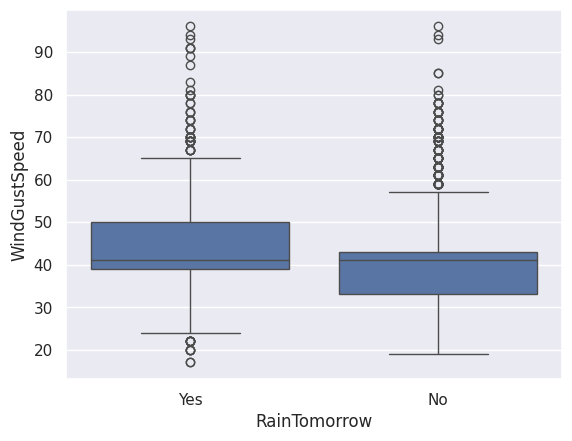

In [9]:
sns.boxplot(data=df,x='RainTomorrow',y='WindGustSpeed')
plt.show()

<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

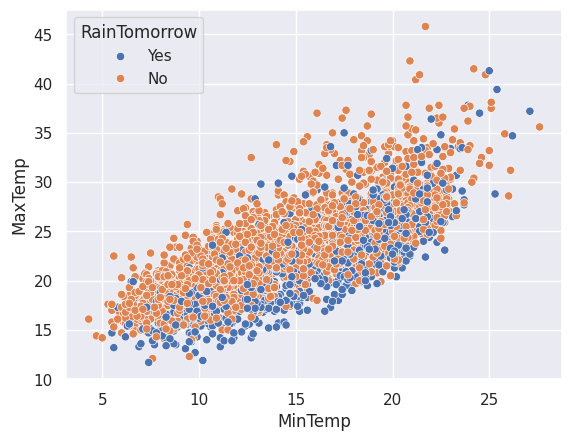

In [10]:
sns.scatterplot(data=df, x="MinTemp", y="MaxTemp", hue="RainTomorrow")

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])

In [12]:
df.dtypes

,0
Date,datetime64[ns]
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,int64
WindGustSpeed,int64
WindDir9am,int64
WindDir3pm,int64


<Axes: xlabel='RainTomorrow', ylabel='count'>

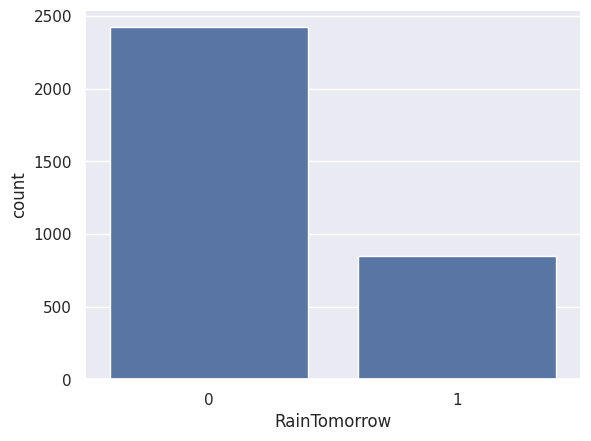

In [13]:
sns.countplot(data=df,x='RainTomorrow')

In [14]:
df_maj = df[(df['RainTomorrow'] == 0)]
df_min = df[(df['RainTomorrow'] == 1)]

df_min_upsampled = resample(df_min,
                            replace=True,
                            n_samples=2422,
                            random_state=42)

df_upsam = pd.concat([df_min_upsampled, df_maj])

<Axes: xlabel='RainTomorrow', ylabel='count'>

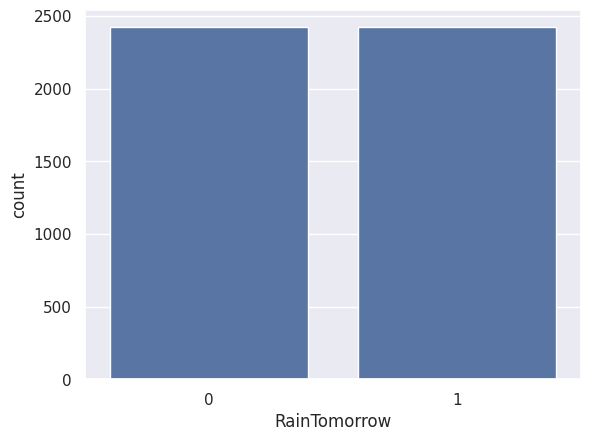

In [15]:
sns.countplot(data=df_upsam,x='RainTomorrow')

In [16]:
df_upsam.drop(columns=['Date'],inplace=True)
df_upsam.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
376,16.4,20.4,23.2,5.4,0.0,13,41,9,9,24,24,86,90,1025.4,1025.0,8,8,18.0,17.9,1,1
1650,16.1,21.9,0.0,10.8,12.2,10,54,8,10,28,26,44,38,1015.2,1015.5,2,1,18.1,20.3,0,1
1027,20.7,28.0,0.0,10.6,8.6,8,52,9,10,9,26,72,62,1011.9,1010.8,5,4,24.7,26.6,0,1
380,19.4,22.9,3.8,7.4,0.0,13,41,9,9,9,17,70,71,1017.0,1015.4,8,8,20.8,22.0,1,1
245,14.6,19.1,3.4,1.0,0.0,13,41,11,8,11,11,93,86,1018.4,1015.3,8,8,14.9,16.0,1,1


In [17]:
z = np.abs(sts.zscore(df_upsam))
dc = df_upsam[(z < 3).all(axis=1)]
dc.shape

(4562, 21)

<Axes: >

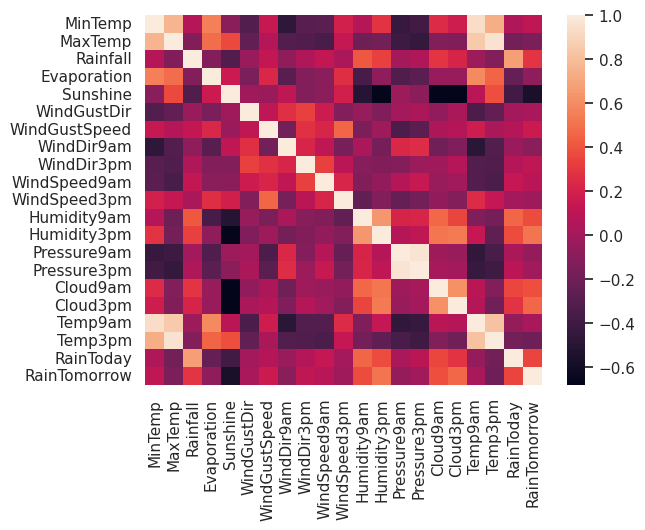

In [18]:
sns.heatmap(dc.corr(),fmt='.2g')

In [19]:
from sklearn.model_selection import train_test_split

x = dc.drop(columns=['RainTomorrow'])
y = dc['RainTomorrow']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("Acurracy Score:",round(accuracy_score(y_test, y_pred)*100,2))
print("F1 Score:",round(f1_score(y_test, y_pred,average='macro')*100,2))
print("Precision Score:",round(precision_score(y_test, y_pred,average='macro')*100,2))
print("Recall Score:",round(recall_score(y_test, y_pred,average='macro')))
print("Log Loss:",(log_loss(y_test,y_pred)))

Acurracy Score: 77.98
F1 Score: 77.98
Precision Score: 77.99
Recall Score: 1
Log Loss: 7.935130702313852


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Acurracy Score:",round(accuracy_score(y_test, y_pred)*100,2))
print("F1 Score:",round(f1_score(y_test, y_pred,average='macro')*100,2))
print("Precision Score:",round(precision_score(y_test, y_pred,average='macro')*100,2))
print("Recall Score:",round(recall_score(y_test, y_pred,average='macro')))
print("Log Loss:",(log_loss(y_test,y_pred)))

Acurracy Score: 82.91
F1 Score: 82.78
Precision Score: 83.91
Recall Score: 1
Log Loss: 6.158608903288363


In [22]:
sv = svm.SVC()
sv.fit(x_train, y_train)
y_pred = sv.predict(x_test)
print("Acurracy Score:",round(accuracy_score(y_test, y_pred)*100,2))
print("F1 Score:",round(f1_score(y_test, y_pred,average='macro')*100,2))
print("Precision Score:",round(precision_score(y_test, y_pred,average='macro')*100,2))
print("Recall Score:",round(recall_score(y_test, y_pred,average='macro')))
print("Log Loss:",(log_loss(y_test,y_pred)))

Acurracy Score: 75.03
F1 Score: 74.99
Precision Score: 75.2
Recall Score: 1
Log Loss: 9.001043781729146


In [23]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print("Acurracy Score:",round(accuracy_score(y_test, y_pred)*100,2))
print("F1 Score:",round(f1_score(y_test, y_pred,average='macro')*100,2))
print("Precision Score:",round(precision_score(y_test, y_pred,average='macro')*100,2))
print("Recall Score:",round(recall_score(y_test, y_pred,average='macro')))
print("Log Loss:",(log_loss(y_test,y_pred)))

Acurracy Score: 89.38
F1 Score: 89.33
Precision Score: 90.06
Recall Score: 1
Log Loss: 3.8293914334549433


In [25]:
imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": dt.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

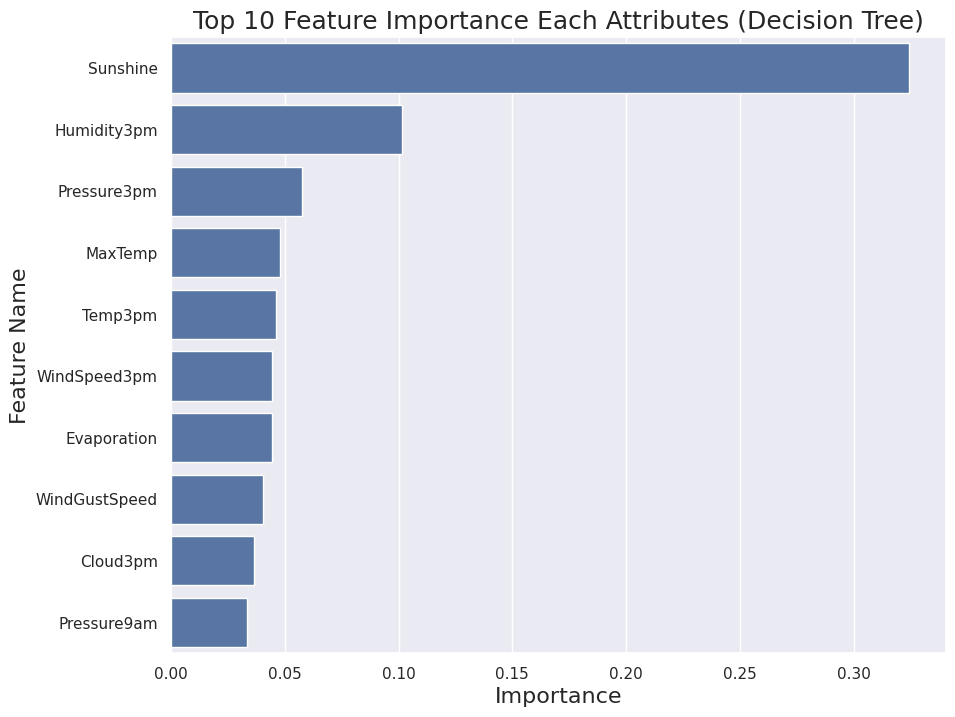

In [26]:
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()